In [36]:
from HW2.benchmark_proceeder import BenchmarkStorage
from HW2.error_calculator import SquaredErrorCalculator
from HW2.optimization import RMSPropOptimization
from HW2.regression_generator import generate_regression
from HW2.sgd import minibatch_gd, normalised_mini
from HW2.visualization import visualize_regression_point, visualize_line
import numpy as np

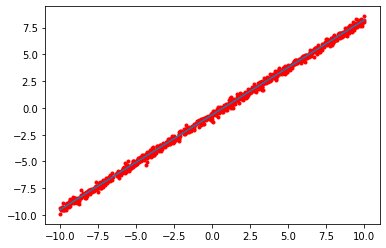

In [37]:
f, points = generate_regression(point_count=1000, y_scale=0.2)

visualize_regression_point(f, points)

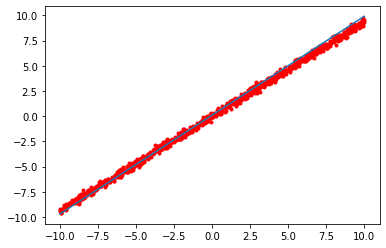

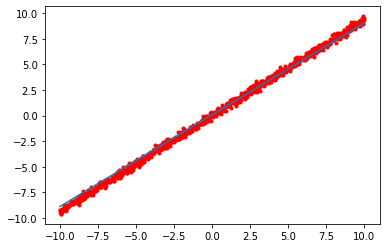

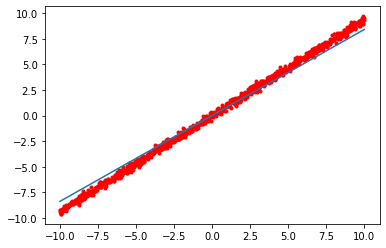

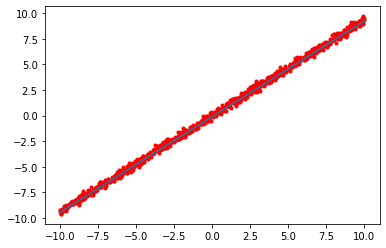

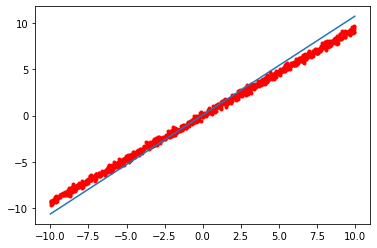

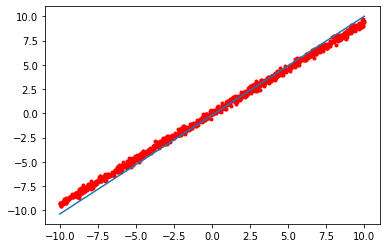

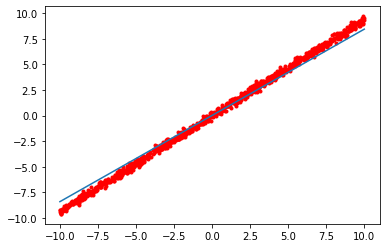

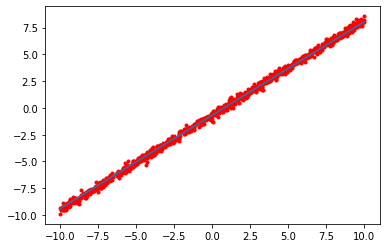

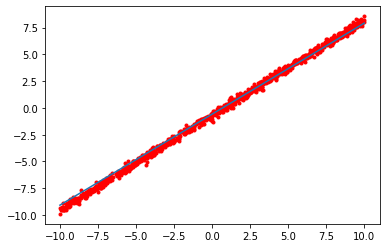

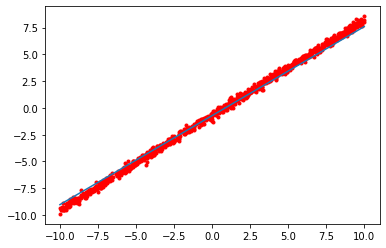

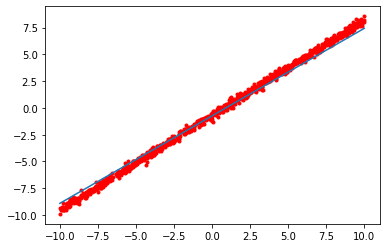

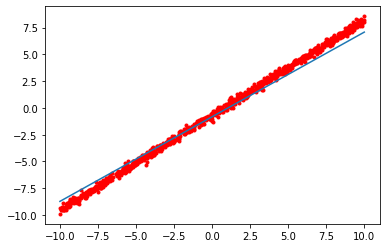

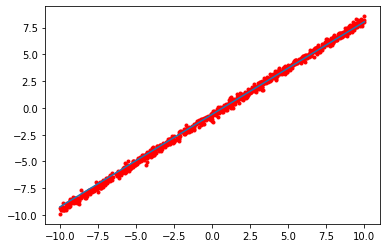

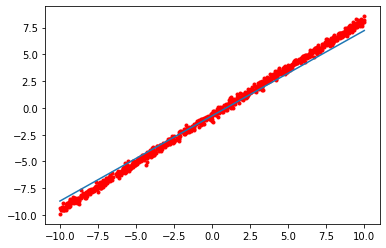

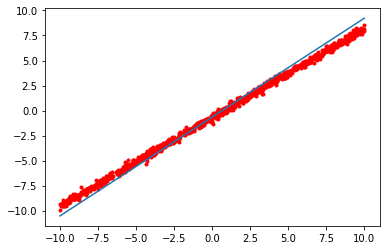

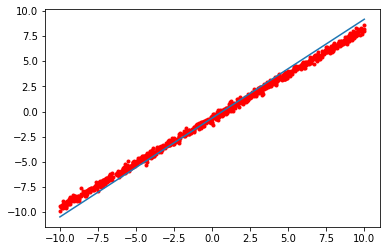

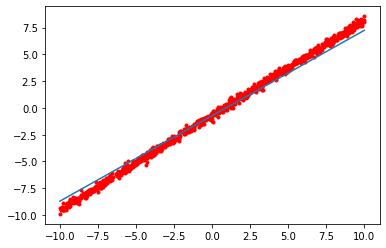

In [38]:
storage = BenchmarkStorage()
index = storage.add_benchmark_config()
for _ in range(10):
    ab, meta = minibatch_gd(points)
    storage.add_benchmark_result(index, meta)
    visualize_line(ab, points)


In [39]:
print(storage.get_benchmark_results(index))

Benchmark results for config <('svd', False, <HW2.optimization.DefaultOptimization object at 0x000001530414B940>, <HW2.error_calculator.SquaredErrorCalculator object at 0x000001530414BB80>)>:
	Mean time:0.5066094
	Mean memory:0.0B
	Mean SMAPE value:0.07593406891517299



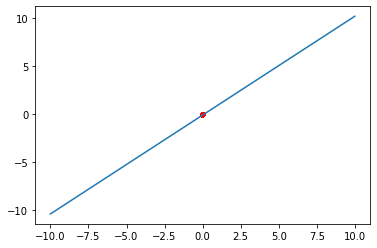

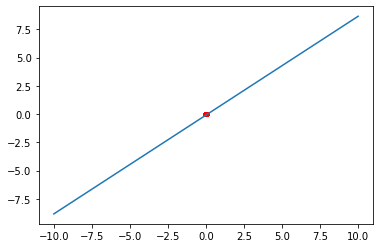

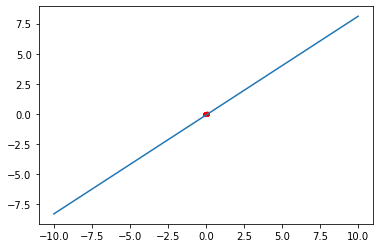

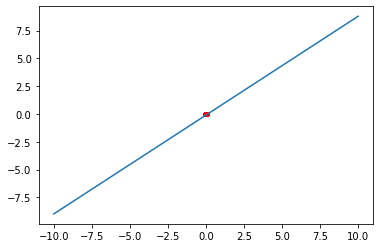

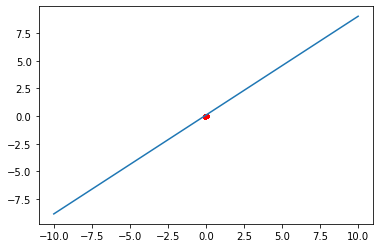

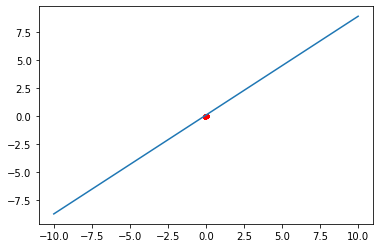

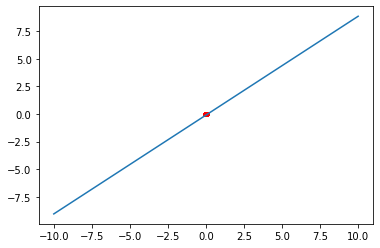

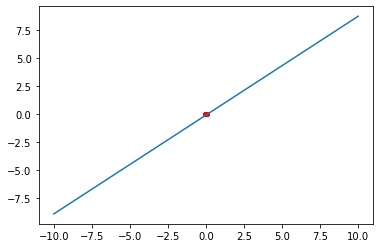

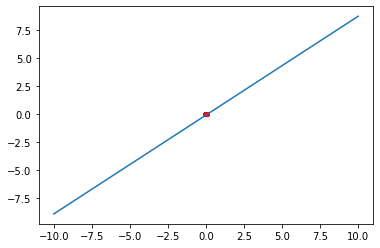

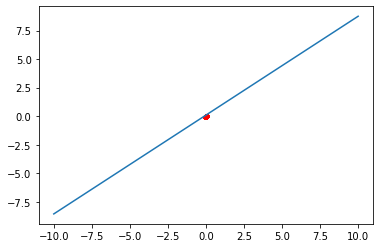

In [40]:
index = storage.add_benchmark_config(normalized=True)
for _ in range(10):
    ab, meta = normalised_mini(points)
    storage.add_benchmark_result(index, meta)
    visualize_line(ab, points / np.linalg.norm(points))

In [41]:
print(storage.get_benchmark_results(index))

Benchmark results for config <('svd', True, <HW2.optimization.DefaultOptimization object at 0x000001530414B940>, <HW2.error_calculator.SquaredErrorCalculator object at 0x000001530414BB80>)>:
	Mean time:0.5169827
	Mean memory:0.0B
	Mean SMAPE value:0.8687443066682938

